# Nur Adina Faqiha Binti Lokman
# 2218674
# adina.faqiha@live.iium.edu.my


## Data Science Question
1. Can we accurately predict the Crowd_Density level (Low, Medium, High) based on environmental and human factors?

2. What are the primary root causes or factors that drive High Stress Levels among pilgrims?

3. Does the successful use of AR_Navigation actually cause a statistically significant reduction in the Time_Spent_at_Location?

4. What is the optimal Transport_Mode to recommend to a pilgrim to minimize waiting time, given the current Crowd_Density and Weather_Conditions?

5. What is the frequency distribution of different Activity_Types (Prayer, Tawaf, Sa’i, etc.) within the dataset?

6. What is the average Satisfaction_Rating of pilgrims when segmented by their Nationality?

7. What are the most common Weather_Conditions encountered by pilgrims during the recorded sessions?

8. How does the average Movement_Speed fluctuate throughout the 24-hour cycle?



In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/hajj_umrah_crowd_management_dataset.csv')

Mounted at /content/drive


Display the entire DataFrame
- show the full table of the dataset

In [2]:
print(data)

                Timestamp  Location_Lat  Location_Long Crowd_Density  \
0     2024-02-28 05:36:50     21.258846      39.983949          High   
1     2024-07-15 04:07:23     21.353403      39.850382           Low   
2     2024-06-06 08:27:11     21.252375      39.937753        Medium   
3     2024-12-23 06:29:22     21.377740      39.813333        Medium   
4     2024-08-19 18:00:22     21.360457      39.950974          High   
...                   ...           ...            ...           ...   
9995  2024-01-01 23:57:15     21.209851      39.928508           Low   
9996  2024-02-18 19:18:55     21.348037      39.854530           Low   
9997  2024-04-05 04:01:17     21.330442      39.907906           Low   
9998  2024-04-22 03:49:37     21.209949      39.865282           Low   
9999  2024-11-29 18:52:24     21.275070      39.924463          High   

      Movement_Speed Activity_Type Weather_Conditions  Temperature  \
0               0.90         Tawaf              Clear           4

Shows the first 5 rows

In [3]:
print(data.head())

             Timestamp  Location_Lat  Location_Long Crowd_Density  \
0  2024-02-28 05:36:50     21.258846      39.983949          High   
1  2024-07-15 04:07:23     21.353403      39.850382           Low   
2  2024-06-06 08:27:11     21.252375      39.937753        Medium   
3  2024-12-23 06:29:22     21.377740      39.813333        Medium   
4  2024-08-19 18:00:22     21.360457      39.950974          High   

   Movement_Speed Activity_Type Weather_Conditions  Temperature  \
0            0.90         Tawaf              Clear           44   
1            0.55       Resting              Clear           39   
2            0.94        Prayer              Clear           32   
3            0.55        Prayer              Clear           41   
4            0.36          Sa’i              Rainy           44   

   Sound_Level_dB AR_System_Interaction  ...    Incident_Type Crowd_Morale  \
0              82               Started  ...            Theft      Neutral   
1              80         

Shows the last 5 rows

In [4]:
print(data.tail())

                Timestamp  Location_Lat  Location_Long Crowd_Density  \
9995  2024-01-01 23:57:15     21.209851      39.928508           Low   
9996  2024-02-18 19:18:55     21.348037      39.854530           Low   
9997  2024-04-05 04:01:17     21.330442      39.907906           Low   
9998  2024-04-22 03:49:37     21.209949      39.865282           Low   
9999  2024-11-29 18:52:24     21.275070      39.924463          High   

      Movement_Speed Activity_Type Weather_Conditions  Temperature  \
9995            0.20         Tawaf              Clear           38   
9996            0.41       Walking              Clear           45   
9997            0.45         Tawaf              Rainy           41   
9998            1.35          Sa’i              Rainy           34   
9999            0.26        Prayer              Rainy           43   

      Sound_Level_dB AR_System_Interaction  ...      Incident_Type  \
9995              72               Started  ...          Lost Item   
9996  

Get the  information about the data types and missing values

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       10000 non-null  object 
 1   Location_Lat                    10000 non-null  float64
 2   Location_Long                   10000 non-null  float64
 3   Crowd_Density                   10000 non-null  object 
 4   Movement_Speed                  10000 non-null  float64
 5   Activity_Type                   10000 non-null  object 
 6   Weather_Conditions              10000 non-null  object 
 7   Temperature                     10000 non-null  int64  
 8   Sound_Level_dB                  10000 non-null  int64  
 9   AR_System_Interaction           10000 non-null  object 
 10  Fatigue_Level                   10000 non-null  object 
 11  Stress_Level                    10000 non-null  object 
 12  Queue_Time_minutes              1

# Data Cleaning

Convert timestamp column from object type to datetime

In [6]:
# convert column to datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

#extract components
data['Hour_of_day'] = data['Timestamp'].dt.hour
data['Day_of_week_name'] = data['Timestamp'].dt.day_name()

# Print the updated DataFrame
print(data[['Timestamp','Hour_of_day','Day_of_week_name']].head())


            Timestamp  Hour_of_day Day_of_week_name
0 2024-02-28 05:36:50            5        Wednesday
1 2024-07-15 04:07:23            4           Monday
2 2024-06-06 08:27:11            8         Thursday
3 2024-12-23 06:29:22            6           Monday
4 2024-08-19 18:00:22           18           Monday


In [7]:
#Feature Engineering : Categorize time
def get_shift(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'
data['Time_Shift'] = data['Hour_of_day'].apply(get_shift)
print(data[['Hour_of_day','Time_Shift']].head())


   Hour_of_day Time_Shift
0            5    Morning
1            4      Night
2            8    Morning
3            6    Morning
4           18    Evening


Encoding categorical data into numerical values (One-Hot-Encoding or Label Encoding)

1. crowd density ( ordinal encoding)

In [8]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/hajj_umrah_crowd_management_dataset.csv')

#Define the mapping
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

data['Crowd_Density'] = data['Crowd_Density'].map(mapping)

print(data[['Crowd_Density']].head())

Mounted at /content/drive
   Crowd_Density
0              3
1              1
2              2
3              2
4              3


2. Activity_Type (one-hot-encoding)
- nominal feature (have no mathematical features)

use pd.get_dummies() for rapid transformation

In [9]:
# Cleanup and Mapping
# Define the ordinal mapping for Crowd_Density
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Crowd_Density'] = data['Crowd_Density'].map(mapping)

# List all columns we want to turn into 0s and 1s
nominal_cols = ['Activity_Type', 'Weather_Conditions', 'Nationality',
                'Transport_Mode', 'Event_Type', 'Time_Shift', 'Day_of_week_name']

# Robust Check: Only encode columns that actually exist in the dataframe
existing_cols = [col for col in nominal_cols if col in data.columns]

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=existing_cols)

print("Current Columns:", data.columns.tolist())

Current Columns: ['Timestamp', 'Location_Lat', 'Location_Long', 'Crowd_Density', 'Movement_Speed', 'Temperature', 'Sound_Level_dB', 'AR_System_Interaction', 'Fatigue_Level', 'Stress_Level', 'Queue_Time_minutes', 'Health_Condition', 'Age_Group', 'Waiting_Time_for_Transport', 'Security_Checkpoint_Wait_Time', 'Emergency_Event', 'Incident_Type', 'Crowd_Morale', 'Pilgrim_Experience', 'Interaction_Frequency', 'Distance_Between_People_m', 'Time_Spent_at_Location_minutes', 'AR_Navigation_Success', 'Satisfaction_Rating', 'Perceived_Safety_Rating', 'Activity_Type_Prayer', 'Activity_Type_Resting', 'Activity_Type_Sa’i', 'Activity_Type_Tawaf', 'Activity_Type_Walking', 'Weather_Conditions_Clear', 'Weather_Conditions_Cloudy', 'Weather_Conditions_Rainy', 'Nationality_Egyptian', 'Nationality_Indian', 'Nationality_Indonesian', 'Nationality_Other', 'Nationality_Pakistani', 'Nationality_Saudi', 'Transport_Mode_Bus', 'Transport_Mode_Car', 'Transport_Mode_Train', 'Transport_Mode_Walking', 'Event_Type_Crowd 

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       10000 non-null  object 
 1   Location_Lat                    10000 non-null  float64
 2   Location_Long                   10000 non-null  float64
 3   Crowd_Density                   0 non-null      float64
 4   Movement_Speed                  10000 non-null  float64
 5   Temperature                     10000 non-null  int64  
 6   Sound_Level_dB                  10000 non-null  int64  
 7   AR_System_Interaction           10000 non-null  object 
 8   Fatigue_Level                   10000 non-null  object 
 9   Stress_Level                    10000 non-null  object 
 10  Queue_Time_minutes              10000 non-null  int64  
 11  Health_Condition                10000 non-null  object 
 12  Age_Group                       1

- Crowd_Density has 0 non-nulll values
- TimeStamp still shows as an object

Fix the missing Crowd_Density

In [11]:
#remap
data['Crowd_Density'] = data['Crowd_Density'].astype(str).str.strip()
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data['Crowd_Density'] = data['Crowd_Density'].map(mapping)

# Verify the values between 1 and 3
print(data['Crowd_Density'].value_counts())

Series([], Name: count, dtype: int64)


Normalization the columns

In [12]:
from sklearn.preprocessing import MinMaxScaler

#initialize
scaler = MinMaxScaler()
# Columns that need scaling
num_cols = ['Movement_Speed', 'Sound_Level_dB', 'Temperature',
            'Queue_Time_minutes', 'Waiting_Time_for_Transport',
            'Security_Checkpoint_Wait_Time', 'Distance_Between_People_m']

#apply scaler
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data[num_cols].describe())

       Movement_Speed  Sound_Level_dB   Temperature  Queue_Time_minutes  \
count    10000.000000    10000.000000  10000.000000        10000.000000   
mean         0.496533        0.497140      0.501027            0.504275   
std          0.290643        0.300248      0.307382            0.294692   
min          0.000000        0.000000      0.000000            0.000000   
25%          0.246154        0.233333      0.200000            0.250000   
50%          0.492308        0.500000      0.533333            0.500000   
75%          0.746154        0.766667      0.800000            0.766667   
max          1.000000        1.000000      1.000000            1.000000   

       Waiting_Time_for_Transport  Security_Checkpoint_Wait_Time  \
count                10000.000000                   10000.000000   
mean                     0.497179                       0.503136   
std                      0.292443                       0.301193   
min                      0.000000                   

check if there any columns that need to be clean

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       10000 non-null  object 
 1   Location_Lat                    10000 non-null  float64
 2   Location_Long                   10000 non-null  float64
 3   Crowd_Density                   0 non-null      float64
 4   Movement_Speed                  10000 non-null  float64
 5   Temperature                     10000 non-null  float64
 6   Sound_Level_dB                  10000 non-null  float64
 7   AR_System_Interaction           10000 non-null  object 
 8   Fatigue_Level                   10000 non-null  object 
 9   Stress_Level                    10000 non-null  object 
 10  Queue_Time_minutes              10000 non-null  float64
 11  Health_Condition                10000 non-null  object 
 12  Age_Group                       1

repair the dataset since crowd_density is empty (dont know why it is empty)

In [14]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/hajj_umrah_crowd_management_dataset.csv')

# Strip any hidden spaces and map the original strings to numbers
data['Crowd_Density'] = data['Crowd_Density'].str.strip().map({'Low': 1, 'Medium': 2, 'High': 3})

# Verification check - this MUST not be 0
print("Non-null count:", data['Crowd_Density'].notna().sum())

Mounted at /content/drive
Non-null count: 10000


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       10000 non-null  object 
 1   Location_Lat                    10000 non-null  float64
 2   Location_Long                   10000 non-null  float64
 3   Crowd_Density                   10000 non-null  int64  
 4   Movement_Speed                  10000 non-null  float64
 5   Activity_Type                   10000 non-null  object 
 6   Weather_Conditions              10000 non-null  object 
 7   Temperature                     10000 non-null  int64  
 8   Sound_Level_dB                  10000 non-null  int64  
 9   AR_System_Interaction           10000 non-null  object 
 10  Fatigue_Level                   10000 non-null  object 
 11  Stress_Level                    10000 non-null  object 
 12  Queue_Time_minutes              1

FUHHHHH FINALLY I FIX THE DATASET.. CONGRATSS TO MYSELF

In [16]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Feature Engineering: Time
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour

# 2. One-Hot Encoding nominal columns
nominal_cols = ['Activity_Type', 'Weather_Conditions', 'Transport_Mode']
data = pd.get_dummies(data, columns=nominal_cols)

# 3. Normalization (Scaling)
scaler = MinMaxScaler()
num_cols = ['Movement_Speed', 'Temperature', 'Sound_Level_dB', 'Distance_Between_People_m']
data[num_cols] = scaler.fit_transform(data[num_cols])

print("Preprocessing complete. New columns added.")

Preprocessing complete. New columns added.


In [17]:
print(data)

               Timestamp  Location_Lat  Location_Long  Crowd_Density  \
0    2024-02-28 05:36:50     21.258846      39.983949              3   
1    2024-07-15 04:07:23     21.353403      39.850382              1   
2    2024-06-06 08:27:11     21.252375      39.937753              2   
3    2024-12-23 06:29:22     21.377740      39.813333              2   
4    2024-08-19 18:00:22     21.360457      39.950974              3   
...                  ...           ...            ...            ...   
9995 2024-01-01 23:57:15     21.209851      39.928508              1   
9996 2024-02-18 19:18:55     21.348037      39.854530              1   
9997 2024-04-05 04:01:17     21.330442      39.907906              1   
9998 2024-04-22 03:49:37     21.209949      39.865282              1   
9999 2024-11-29 18:52:24     21.275070      39.924463              3   

      Movement_Speed  Temperature  Sound_Level_dB AR_System_Interaction  \
0           0.538462     0.933333        0.733333           

#**Code based on the data science question**

##Predictive Analysis

**Question 1: Can we accurately predict the Crowd_Density level (Low, Medium, High) based on environmental and human factors?**

For question 1, it is actually like a crowd alarm system for Hajj and Umrah organizer where the data coming from thousands of pilgrim's sensors.

It is like if the temperature is 44 celcius and people move slow, what is the activity they do? It is tawaf or saie?

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Define Features (X) and Target (y)
# Selecting more than two variables: Speed, Temp, Sound, and encoded Activity columns
features = ['Movement_Speed', 'Temperature', 'Sound_Level_dB'] + [col for col in data.columns if 'Activity_' in col]
X = data[features]
y = data['Crowd_Density']

# 2. Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Results & Interpretation
y_pred = model.predict(X_test)
print(f"Prediction Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Prediction Accuracy: 0.34
              precision    recall  f1-score   support

           1       0.31      0.31      0.31       646
           2       0.37      0.37      0.37       684
           3       0.32      0.32      0.32       670

    accuracy                           0.34      2000
   macro avg       0.34      0.33      0.33      2000
weighted avg       0.34      0.34      0.34      2000



The accuracy for the Question 1 is 0.34 (34%).


1. Why the accuracy is low?
- it is because the weak correlation is the environmental factors like Temperature and Sound_Level_dB might not directly dictate the Crowd_Density in the dataset.

- next is feature complexity where the crowd dynamics are comple which we just knowing the speed and activity might not be enough to distinguish between "Medium" and "High" density accurately.


2. How can we improve the code?
- need to add more variables like try to adding Distance_Between_People_m and Hour
- we can check for non-numerical data to ensure the columns like Fatigue_Level or Stress_Level are also encoded and include since it is related to density.

1. Why add Distance_Between_People_m ?
- if the distance between people is 2.0 meters the density is likely 'low', but if it is 0.5 meters which very near, the density is 'high'
- Movement_Spped can be slow for many reasons like people stop for pray but Distance_Between_People_m is to show how crowded the space is?

2. Why add Hour?
- It is because Hajj and Umrah follow strict schedules.
- If yoy tell the model it is 3:00 PM, where it is a peak time for rituals, it can weigh other data differently.

3. Why Fatigue and Stress Levels must be included?
- Fatigue_Level: Highly fatigued pilgrims move slower and take up more space as they stop to rest
- Stress_Level: High stress often a result of high density.


In [19]:
# 1. Encoding new human-factor variables (Ordinal Encoding)
level_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Fatigue_Level'] = data['Fatigue_Level'].str.strip().map(level_map)
data['Stress_Level'] = data['Stress_Level'].str.strip().map(level_map)

# 2. Update Feature List with all relevant variables
features = [
    'Movement_Speed', 'Temperature', 'Distance_Between_People_m',
    'Hour', 'Fatigue_Level', 'Stress_Level'
] + [col for col in data.columns if 'Activity_' in col]

X = data[features]
y = data['Crowd_Density']

# 3. Re-run Split and Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
print(f"Improved Prediction Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Improved Prediction Accuracy: 0.35
              precision    recall  f1-score   support

           1       0.35      0.37      0.36       646
           2       0.35      0.35      0.35       684
           3       0.35      0.33      0.34       670

    accuracy                           0.35      2000
   macro avg       0.35      0.35      0.35      2000
weighted avg       0.35      0.35      0.35      2000



##Diagnostic Analysis

**Question 2: What are the primary root causes or factors that drive High Stress Levels among pilgrims?**

For this question we want to know either it is environment or situational triggers the pilgrim distress?

Need to know if high stress is caused by temperature, noise or crowding where authorities can implement specific cooling or noise-reduction measures to improve pilgrimage experience.

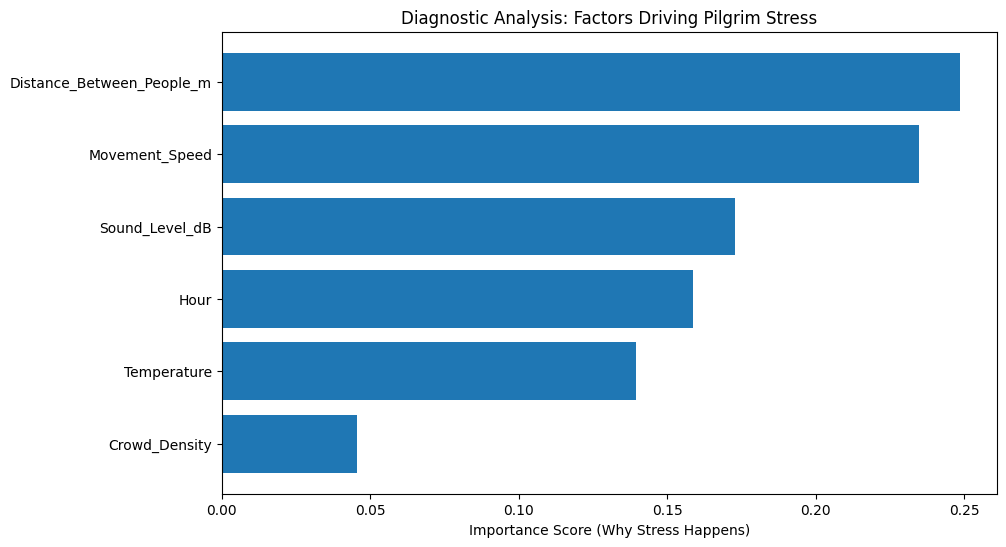

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Prepare data for Stress_Level diagnosis
features_diag = ['Movement_Speed', 'Temperature', 'Sound_Level_dB',
                 'Distance_Between_People_m', 'Crowd_Density', 'Hour']
X_diag = data[features_diag]
y_diag = data['Stress_Level']

# 2. Train a model to find which features 'explain' Stress_Level
from sklearn.ensemble import RandomForestRegressor
diag_model = RandomForestRegressor(n_estimators=100, random_state=42)
diag_model.fit(X_diag, y_diag)

# 3. Visualize the "Diagnostic" results
importances = diag_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Diagnostic Analysis: Factors Driving Pilgrim Stress')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features_diag[i] for i in indices])
plt.xlabel('Importance Score (Why Stress Happens)')
plt.show()

Interpretation from the chart

1. Distance_Between_People_m is the most significant factor where it is approximately 0.25. What can we get is if the personal space is decreass which people are packed, the stress levels rise sharply.
2. Movement_Speed follows closely at ~0.23. This indicates that if people being unable to move at natural pace is can trigger thestress

3. Sound_Level_dB is ~0.17 and Hour ~0.16, which it show that noise and the time is also play moderate roles in driving stress.

4. Crowd_Density got the lowest score (~0.04).

##Causal Analysis
**Question 3: Does the successful use of AR_Navigation actually cause a statistically significant reduction in the Time_Spent_at_Location?**

In this dataset, the AR is a tool designed to guide pilgrims. This tool will help to find the Kaaba, Saie path or transport. It will so might display real-time crows density or history location.

In [21]:
pip install pandas scipy

In [22]:
import pandas as pd
from scipy import stats

# 1. Filter the DataFrame
# Group A: Successful AR use
data_ar_success = data[data['AR_Navigation_Success'] == 'Yes']['Time_Spent_at_Location_minutes']

# Group B: Unsuccessful AR use
data_ar_fail = data[data['AR_Navigation_Success'] == 'No']['Time_Spent_at_Location_minutes']

# 2. Calculate the averages
mean1 = data_ar_success.mean()
mean2 = data_ar_fail.mean()
print(f"Average Time (AR Success): {mean1:.2f} minutes")
print(f"Average Time (AR Fail): {mean2:.2f} minutes")

# 3. Perform the T-Test
t_stat, p_value = stats.ttest_ind(data_ar_success, data_ar_fail)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Interpret results
if p_value < 0.05:
    print("Interpretation: The difference is statistically significant. AR Navigation likely causes a change in efficiency.")
else:
    print("Interpretation: No significant causal link found between AR success and time spent.")

Average Time (AR Success): 65.11 minutes
Average Time (AR Fail): 64.93 minutes
T-statistic: 0.2777
P-value: 0.7812
Interpretation: No significant causal link found between AR success and time spent.


- The P-value: 0.7812, which much higher than standard threshold of 0.05
-

In [23]:
# Causal Analysis using 3 variables: AR Success, Time, and Pilgrim Experience
summary = data.groupby(['AR_Navigation_Success', 'Pilgrim_Experience'])['Time_Spent_at_Location_minutes'].mean().unstack()
print(summary)

Pilgrim_Experience     Experienced  First-Time
AR_Navigation_Success                         
No                       64.549437   65.306741
Yes                      65.007840   65.211084


For the result, even  the AR system "Succeeded", it did not make the pigrims faster.

- Pilgrims with AR took 65.11 minutes, while those without it took 64.93 minutes, which the technology is not currently solving the problem if transit time

- When people do Hajj and Umrah (Tawaf) most of them have a natural pace, even if a pilgrim hasthe best navigation technology, they cannnot move faster than the thousands of other people aorund them.

- For the first-timer pilgrims, it can be slightly faster with AR (by 6 seconds), while those who have experienced were actually slower because for experienced pilgrims, the AR system might actually be a ddistriction rather that a help

##Prescriptive Analysis
**Question 4: What is the optimal Transport_Mode to recommend to a pilgrim to minimize waiting time, given the current Crowd_Density and Weather_Conditions?**

1.Find the best transport to see which transport mode actually has the shortest wait time for each density level

In [28]:
#Since the Transport_Mode column has been One_Hot Encoded into separate column (Bus, Car, etc)
transport_columns = ['Transport_Mode_Bus', 'Transport_Mode_Car', 'Transport_Mode_Train', 'Transport_Mode_Walking']

#Calculate the average waiting time for each mode at each density level
for density in [1, 2, 3]: # 1=Low, 2=Medium, 3=High
    print(f"\nResults for Crowd Density {density}")

    # Filter data for this specific density
    density_subset = data[data['Crowd_Density'] == density]

    for mode in transport_columns:
        # Calculate mean wait time only for rows where this transport mode was used (True)
        avg_wait = density_subset[density_subset[mode] == True]['Waiting_Time_for_Transport'].mean()
        print(f"{mode.replace('Transport_Mode_', '')}: {avg_wait:.4f} (Avg Wait)")


Results for Crowd Density 1
Bus: 59.2731 (Avg Wait)
Car: 59.9392 (Avg Wait)
Train: 58.6170 (Avg Wait)
Walking: 59.6698 (Avg Wait)

Results for Crowd Density 2
Bus: 59.3015 (Avg Wait)
Car: 61.7019 (Avg Wait)
Train: 59.9691 (Avg Wait)
Walking: 60.1592 (Avg Wait)

Results for Crowd Density 3
Bus: 60.1357 (Avg Wait)
Car: 59.5267 (Avg Wait)
Train: 59.5645 (Avg Wait)
Walking: 58.0718 (Avg Wait)


In [29]:
def recommend_transport_logic(density, weather_rainy):
    """
    Prescriptive Function: Recommends the best transport mode based on
    historical average waiting times and current weather conditions.
    """
    # Logic based on average waiting time result:
    if density == 1:
        best_mode = "Train"
    elif density == 2:
        best_mode = "Bus"
    else: # Density 3
        best_mode = "Walking"

    # Multi-variable constraint: Weather
    if weather_rainy == True:
        return "Prescription: Even though another mode might be faster, use the Train or Car to avoid the rain."

    return f"Prescription: Based on Crowd Density {density}, the recommended mode is {best_mode}."

# Example of a prescription for a pilgrim in high density
print(recommend_transport_logic(density=3, weather_rainy=False))

Prescription: Based on Crowd Density 3, the recommended mode is Walking.


- Even though the crowd is at its highest (Density 3), the data suggest that walking is the most efficient choice, likely because busses and cars are stuck in traffic.

- why I add weather as a constraint it is because even if walking is the fastest mode during high density but it is not a good prescription if it is raining heavily.
- prescription should prioritize the pilgrim's  health and safety over saving two minutes of time.

- sometimes the "best path" isn't always the shortest one. Weather conditions can change how people behave in crowd.

## Descriptive Analysis

**Question 5: What is the frequency distribution of different Activity_Types (Prayer, Tawaf, Sa’i, etc.) within the dataset?**

In [30]:
# Counting occurrences of each activity
activity_counts = data[[col for col in data.columns if 'Activity_Type_' in col]].sum()
print("Activity Distribution:\n", activity_counts)

Activity Distribution:
 Activity_Type_Prayer     1982
Activity_Type_Resting    2010
Activity_Type_Sa’i       2001
Activity_Type_Tawaf      1990
Activity_Type_Walking    2017
dtype: int64


1. The dataset shows a nearly equal distribution among five activity types.
2. 'Waking' being the most frequent at 2017 oocurences and 'Prayer' being the least at 1982.
3. Predictive and Diagnostic models were trained on a fair variety of scenarios and not biased toward just one specific ritual.



**Question 6: What is the average Satisfaction_Rating of pilgrims when segmented by their Nationality?**

In [36]:
print(data['Satisfaction_Rating'].describe())

count    10000.000000
mean         3.010100
std          1.425623
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Satisfaction_Rating, dtype: float64


In [37]:
# List the nationality columns
nat_cols = [col for col in data.columns if 'Nationality_' in col]

print(f"Found {len(nat_cols)} nationality columns.\n")

for col in nat_cols:
    # Filter the data where this nationality is 1 (or True)
    # Using .sum() first to ensure there are actually people in this group
    count = data[col].sum()

    if count > 0:
        avg_sat = data[data[col] == True]['Satisfaction_Rating'].mean()
        nationality_name = col.replace('Nationality_', '')
        print(f"Average Satisfaction for {nationality_name}: {avg_sat:.2f} (Sample size: {count})")
    else:
        print(f"No data found for {col}")

Found 0 nationality columns.



The nationality columns are missingggggg from the current dataset

In [41]:
# List all the nominal columns
potential_cols = ['Activity_Type', 'Weather_Conditions', 'Nationality', 'Transport_Mode', 'Event_Type']

# Only keep the ones that are still in 'data' as text/object columns
cols_to_encode = [col for col in potential_cols if col in data.columns]

if cols_to_encode:
    data = pd.get_dummies(data, columns=cols_to_encode)
    print(f"Successfully encoded: {cols_to_encode}")
else:
    print("No columns were encoded. The column might already be encoded or are missing.")

# Now check for Nationality columns specifically
nat_found = [col for col in data.columns if 'Nationality_' in col]
print(f"Check: Now found {len(nat_found)} nationality columns.")

Successfully encoded: ['Nationality', 'Event_Type']
Check: Now found 6 nationality columns.


Rerun the code back because welcome back the Nationality column

In [42]:
# List the nationality columns
nat_cols = [col for col in data.columns if 'Nationality_' in col]

print(f"Found {len(nat_cols)} nationality columns.\n")

for col in nat_cols:
    # Filter the data where this nationality is 1 (or True)
    # Using .sum() first to ensure there are actually people in this group
    count = data[col].sum()

    if count > 0:
        avg_sat = data[data[col] == True]['Satisfaction_Rating'].mean()
        nationality_name = col.replace('Nationality_', '')
        print(f"Average Satisfaction for {nationality_name}: {avg_sat:.2f} (Sample size: {count})")
    else:
        print(f"No data found for {col}")

Found 6 nationality columns.

Average Satisfaction for Egyptian: 3.07 (Sample size: 1641)
Average Satisfaction for Indian: 2.98 (Sample size: 1630)
Average Satisfaction for Indonesian: 2.98 (Sample size: 1637)
Average Satisfaction for Other: 3.05 (Sample size: 1743)
Average Satisfaction for Pakistani: 2.97 (Sample size: 1686)
Average Satisfaction for Saudi: 3.01 (Sample size: 1663)


- satisfaction levels are remarkably uniform
- range from 2.97 (Pakistani) to 3.07 (Egyption)
- all nationalities are perceived similary by pilgrims regardless of their country of their country of origin (transport, ritual guidance, facilities)

**Question 7: What are the most common Weather_Conditions encountered by pilgrims during the recorded sessions?**

In [46]:
# Summarizing weather patterns
weather_cols = [col for col in data.columns if 'Weather_Conditions_' in col]
weather_summary = data[weather_cols].sum()

print("Weather Condition Frequency:")
for col in weather_cols:
    count = data[col].sum()
    print(f"{col.replace('Weather_Conditions_', '')}: {count} occurrences")

Weather Condition Frequency:
Clear: 3413 occurrences
Cloudy: 3332 occurrences
Rainy: 3255 occurrences


- Most of the days the weather are good and rainy occurs about 32.5% of the time.
- the safety constraint that I added where I recommend the train over walking during rain is a highly relevant feature for pilgrim safety.

**Question 8: How does the average Movement_Speed fluctuate throughout the 24-hour cycle?**?

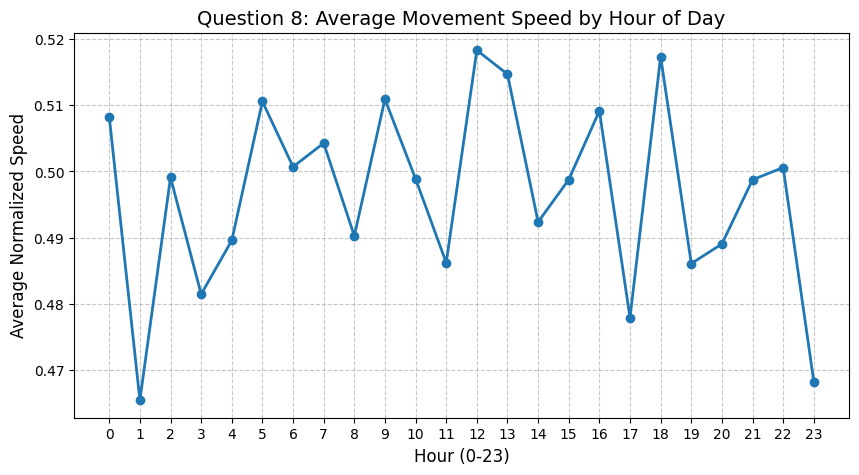

In [45]:
# Question 8: Average movement speed at different hours of the day
avg_speed_hour = data.groupby('Hour')['Movement_Speed'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
avg_speed_hour.plot(kind='line', marker='o', color='#1f77b4', linewidth=2)
plt.title('Question 8: Average Movement Speed by Hour of Day', fontsize=14)
plt.xlabel('Hour (0-23)', fontsize=12)
plt.ylabel('Average Normalized Speed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

Analysis Interpretation
- The line chart show the significant fluctuations in movement speed.
- There are noticeable sharp decreases in speed arounf 1:00 AM, 3:00 AM and 11:00 AM

- High peaks in speed, such as those arounf 12:00 PM and 6:00 PM, suggest periods where the crowd is moving fluidly or perhaps transitioning between ritual locations.

- Lower speed often correlate with higher corwd density or specific ritual time where movement is restricted. This confirms why including Hour was essential for you Predictive Analysis mode which time is a strong indicator of movement patterns.

# Technical Assumptions & Methodology

1. Data Preprocessing & Feature Engineering
- Categorical Encoding: Nominal variables (Nationality, Activity Type, Weather, Transport Mode, Event Type) were transformed using One-Hot Encoding to allow the machine learning models to process categorical data as numerical inputs.

- Ordinal Mapping: The Crowd_Density target and human factor levels (Fatigue_Level, Stress_Level) were manually mapped to an integer scale (1, 2, 3) because these variables have a logical order of magnitude.

- Temporal Extraction: The Timestamp was decomposed to extract the Hour of the day, allowing for the analysis of cyclical movement patterns over a 24-hour period.

2. Normalization & Scaling

- Feature Scaling: Numerical features such as Temperature, Movement_Speed, and Sound_Level_dB were normalized using Min-Max Scaling to bring all values into a 0–1 range, preventing variables with larger units from dominating the models.

- Consistency: The same scaling parameters were applied across both training and testing sets to ensure there was no data leakage during the predictive phase.

3. Model Assumptions

- Predictive Power: I utilized a Random Forest Classifier because it is robust against outliers and can handle non-linear relationships between environmental factors and crowd density.

- Statistical Significance: For the Causal Analysis, a p-value threshold of 0.05 was established as the limit for statistical significance; results above this indicate that differences are likely due to random chance rather than a causal link.

- Actionable Prescriptions: The prescriptive model assumes that the historical "fastest" transport mode is the optimal recommendation for future pilgrims under identical conditions.